In [ ]:
## IN THIS PYTHON FILE I WILL SHOW HOW TO PROPERLY CONNECT TO THE U.S. BUREAU OF LABOR STATISTICS PUBLIC DATA API...
## SINCE BLS DATA IS IN JSON FORM AND API, REQUESTS & JSON NEED TO BE INSTALLED...

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
## THIS IS ONE WAY OF LOADING IN THE API DATA HOWEVER GETS IT DONE IN A SIMPLE MANNER...
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
SERIES_ID = "APU000074714"
START_YEAR = 2015
END_YEAR = 2024


In [ ]:
payload = {
    "seriesid": [SERIES_ID],
    "startyear": str(START_YEAR),
    "endyear": str(END_YEAR)
}

In [ ]:
response = requests.post(BLS_API_URL, json=payload)
data = response.json()

In [ ]:
if "Results" not in data:
    print("Error fetching data:", data)
    exit()

In [ ]:
cpi_data = []
for series in data["Results"]["series"]:
    for item in series["data"]:
        year = item["year"]
        month = item["periodName"]
        value = float(item["value"])
        cpi_data.append({"Year": year, "Month": month, "CPI": value})

In [ ]:
df = pd.DataFrame(cpi_data)
df["Date"] = pd.to_datetime(df["Month"] + " " + df["Year"])
df = df.sort_values(by="Date")

<ipython-input-7-6ed25fe3cbbe>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Month"] + " " + df["Year"])


In [ ]:
csv_filename = "gasoline_cpi_2015_2024.csv"
df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to gasoline_cpi_2015_2024.csv


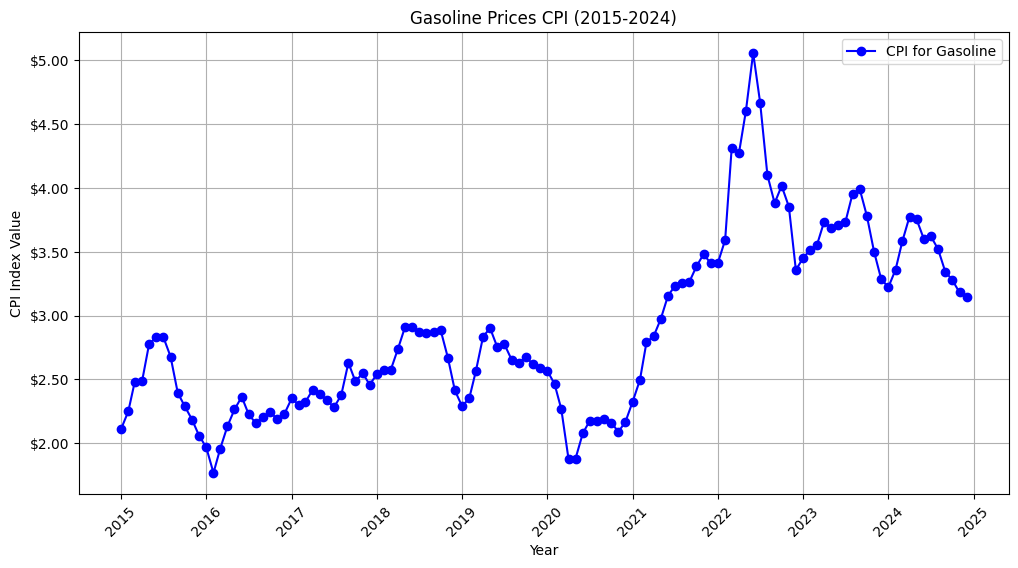

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["CPI"], marker="o", linestyle="-", color="b", label="CPI for Gasoline")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.xlabel("Year")
plt.ylabel("CPI Index Value")
plt.title("Gasoline Prices CPI (2015-2024)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()